In [1]:
# %load main.py
import sys
# import importlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

from armax import armax
from config import config
import mysql_utils as mysql
import preprocessing
import visualization

In [2]:
DATA_FREQUENCY = dt.timedelta(minutes=5)

In [3]:
#DETECTOR_DATA_TABLE = "detector_data_processed_2017_1"
DETECTOR_DATA_TABLE = "detector_data_processed_2017"
DETECTOR_ID = "608219"
DETECTOR_DATA_QUERY = "SELECT DetectorID, Year, Month, Day, Time, Volume, Occupancy\
                        FROM {} AS DD NATURAL JOIN detector_health AS DH\
                        WHERE DetectorID = {} AND Health = 1\
                        ORDER BY Year, Month, Day, Time;".format(DETECTOR_DATA_TABLE, DETECTOR_ID)

In [4]:
flow = pd.read_csv("flow_original.csv", index_col=0, parse_dates=True)

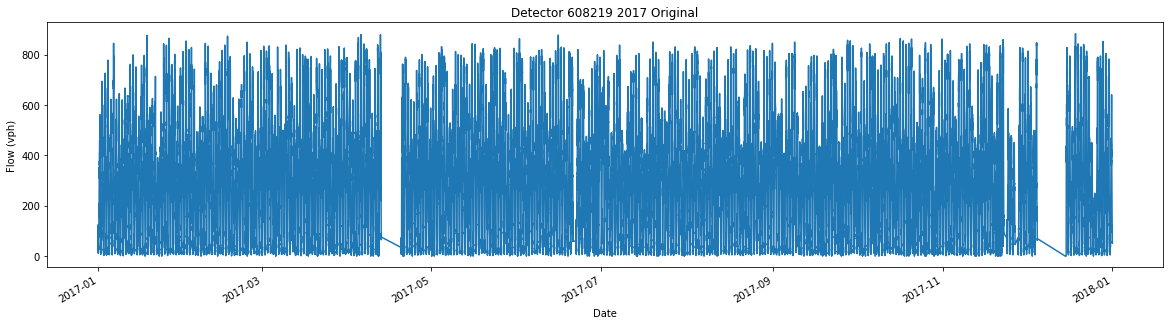

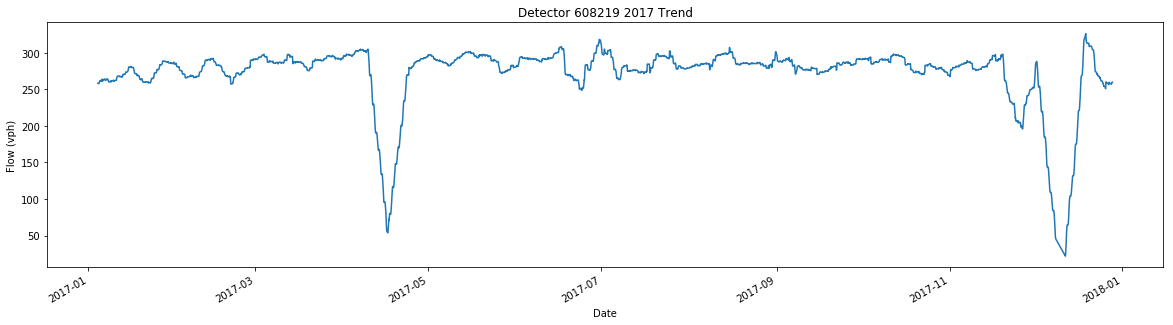

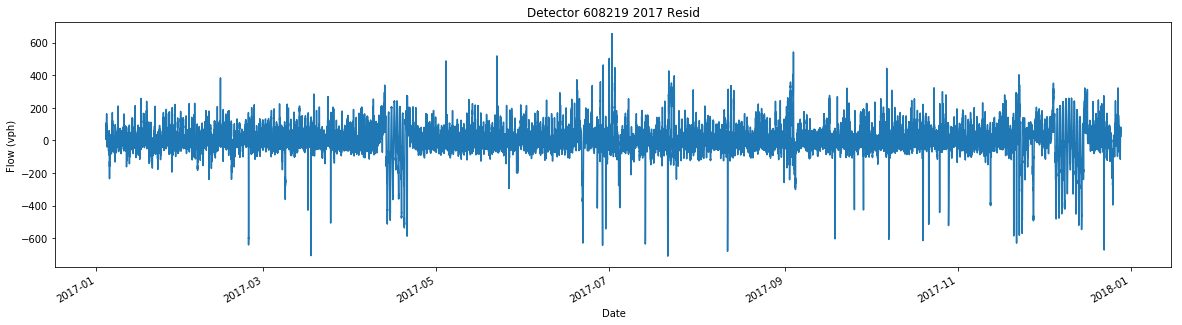

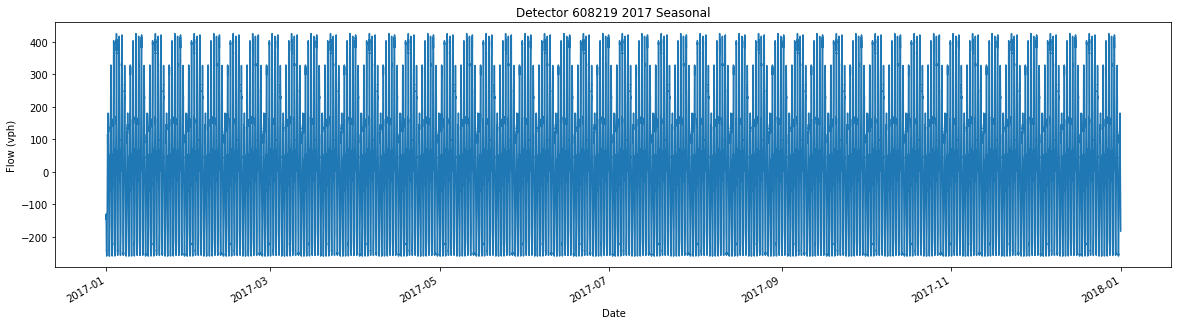

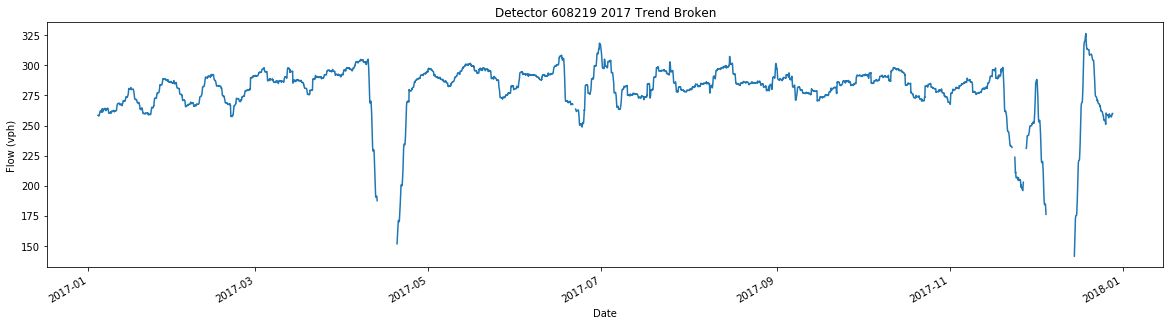

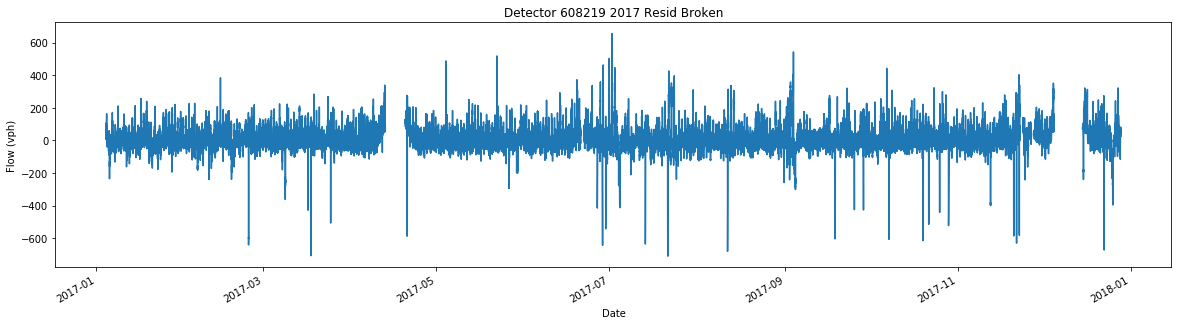

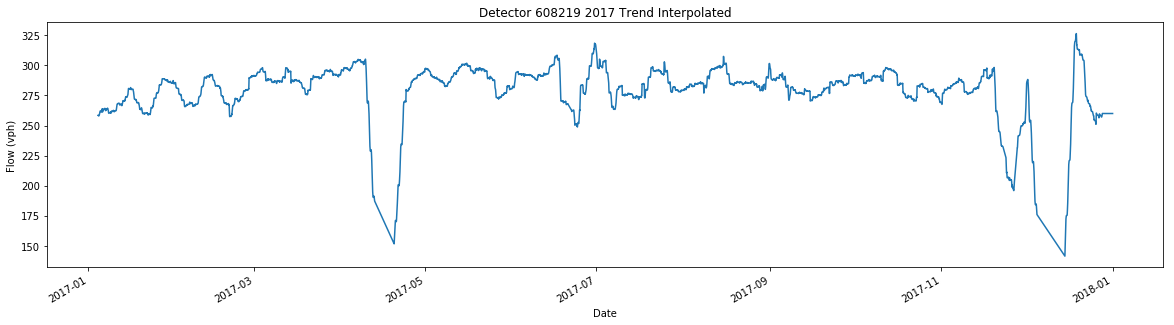

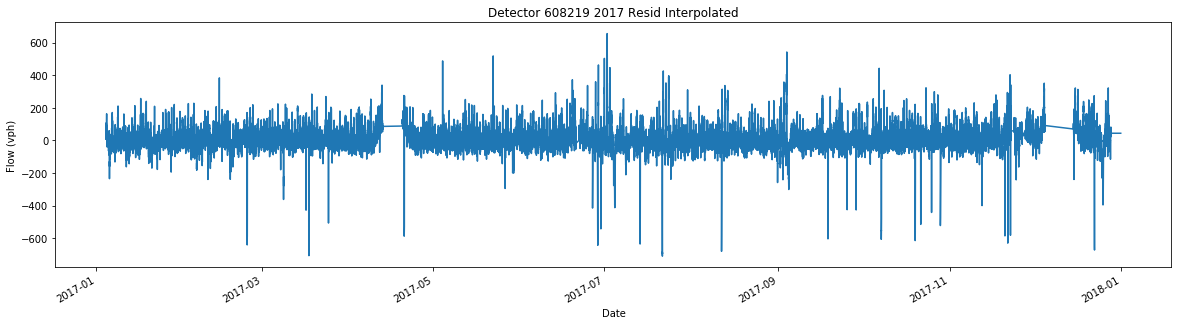

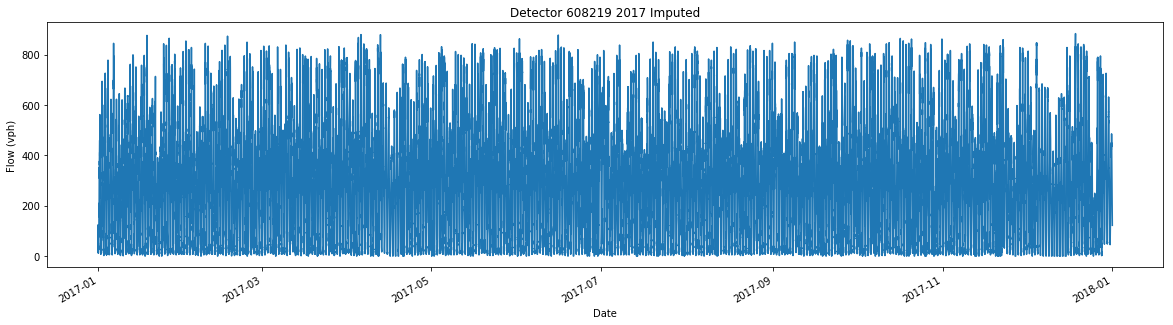

In [5]:
flow = preprocessing.impute_seasonal_data(flow, DATA_FREQUENCY, 12*24*7, lower_bound=0, graph=True,
                                          title="Detector {} 2017".format(DETECTOR_ID),
                                          ylabel="Flow (vph)", figsize=(20, 5))

In [ ]:
armax_model = armax(flow, dates=time, frequency=DATA_FREQUENCY)

In [ ]:
armax_model.fit_to_order((1, 1), method="css", cross_validate=True, verbose=True)

In [ ]:
armax_model.fit(method="css", cross_validate=True, verbose=True)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.title("ARMA(3, 3) Model for Flow Detector Data in 2017")
fig.autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Flow")

plt.plot(time[:5000], flow.values[:5000])
plt.plot(time[:5000], armax_model._armax_models[armax_model.get_best_model_order()].fittedvalues.values[:5000])
plt.show()

In [ ]:
for order in armax_model._armax_models:
    m = armax_model._armax_models[order]
    print(order)
    print(m.aic)
    print(m.bic)
    print(np.sum(np.power(m.resid, 2)))

In [ ]:
print(armax_model.best_model_order)

In [ ]:
a = armax_model._armax_models[(3, 3)]

In [ ]:
b = armax_model._armax_models[(1, 1)]

In [ ]:
index0 = min(range(len(time)), key=lambda i: (1 - (time[i].month == 9)))
index1 = min(range(len(time)), key=lambda i: (1 - (time[i].month == 10)))
index2 = min(range(len(time)), key=lambda i: (1 - (time[i].month == 11)))
index3 = min(range(len(time)), key=lambda i: (1 - (time[i].month == 12)))

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
fig.autofmt_xdate()
plt.plot(time[index0:index1], flow[index0:index1])
plt.plot(time[index0:index1], a.fittedvalues[index0:index1])
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
fig.autofmt_xdate()
plt.plot(time[index1:index2], flow[index1:index2])
plt.plot(time[index1:index2], a.fittedvalues[index1:index2])
plt.show()